### assign

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft,ifft,dct,idct
import pywt

In [2]:
L=[]
for i in range(327):
    L.append(100*i)

In [3]:
rate, x = wavfile.read('test.wav')

In [4]:
len(x)

91392

In [5]:
r=[]
for i in range(32768):
    r.append(x[i])

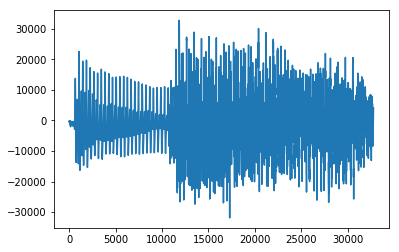

In [6]:
plt.plot(r)

In [7]:
C=dct(r)
y2=idct(C)/(2*rate)
y2

array([-338.82557823, -344.02684807, -262.29260771, ..., 2945.40480726,
       2974.38331066, 2984.04281179])

In [8]:
def X_m2(X,L):
    N=len(X)
    Xm2=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm2.append(X[i])
        else:
            Xm2.append(0)
    return Xm2

In [9]:
def error(x,xm3):
    x=np.array(x)
    xm3=np.array(xm3)
    E3=np.mean((abs(x-xm3))**2)
    return E3

In [10]:
E2=[]
for i in range(327):
    Xm2=X_m2(C,L[i])
    xm2=idct(Xm2)/(2*rate)
    k=error(r,xm2)
    E2.append(k)

In [11]:
len(E2)

327

### DFT

In [12]:
def X_m1(X,L):
    Xm1=[]
    N=len(X)
    for i in range(N):
        if i<=int((N-1-L)/2):
            Xm1.append(X[i])
        elif i>=int((N+1-L)/2) and i<=int((N-1+L)/2):
            Xm1.append(0)
        elif i>=int((N+1+L)/2) and i<=N-1:
            Xm1.append(X[i])
    return Xm1

In [13]:
D=fft(r)

In [14]:
E1=[]
for i in range(327):
    Xm1=X_m1(D,L[i])
    xm1=ifft(Xm1)
    k=error(r,xm1)
    E1.append(k)

### Haar

In [15]:
def haar(x):
    out = []
    (ca, cd) = pywt.dwt(x,'haar')
    out = list(cd)+out
    while len(ca)!=1:
        (ca, cd) = pywt.dwt(ca,'haar')
        out = list(cd)+out
    out = list(ca)+out
    return out

In [16]:
def ihaar(x):
    N = len(x)
    i = 0
    x[:2] = pywt.idwt([x[0]], [x[1]],'haar')
    i = 2
    while 2*i<N+1:
        try:
            x[:2*i] = pywt.idwt(x[:i],x[i:2*i],'haar')
        except:
            print(i)
            return
        i = 2*i
    return x

In [17]:
H=haar(r)

In [18]:
E3=[]
for i in range(327):
    Xm3=X_m2(H,L[i])
    xm3=ihaar(Xm3)
    k=error(r,xm3)
    E3.append(k)

In [19]:
T=[]
for i in range(327):
    T.append((32768-(i*100))/32768)
T.reverse()

### Plot of Error vs. L

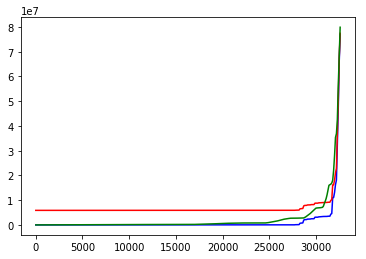

In [20]:
plt.plot(L,E1,'-b')
plt.plot(L,E2,'-r')
plt.plot(L,E3,'-g')

In [21]:
E1.reverse()
E2.reverse()
E3.reverse()

### Plot of Error vs. bits/sample

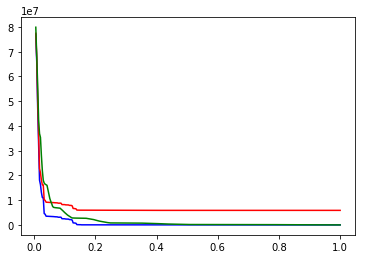

In [22]:
plt.plot(T,E1,'-b')
plt.plot(T,E2,'-r')
plt.plot(T,E3,'-g')

### DFT - BLUE
### DCT - GREEN
### HAAR - RED